# Creating The Model
Bu notebookta amacım derin öğrenme modelimizi yaratmak eğitmek ve onu test etmek olacaktır. Ön işleme notebook'undan aldığımız verileri notebookun içine çekerek başlayacağız. Onları böleceğiz, ardından modelimizi tensorflow ile yazacağız ve eğiteceğiz. Loss ve accuracy değerlerini anlaşılır hale getireceğiz ve böylece projenin sonuna gelmiş olacağız.

In [27]:
#ilk olarak gerekli modüllerimizi dahil ederek işe başlayabiliriz.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.preprocessing import LabelEncoder

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Öncelikle X veri setimizi txt dosyalarından alıp tekrar boyut kazandıralım
#bu fonksiyon yardımıyla tüm txt dosyalarının isimlerini içeren bir listemiz olmuş oldu
file_names = os.listdir('/content/drive/MyDrive/image_arrays')


In [12]:
print(file_names)

['image_array_7776_9.txt', 'image_array_7764_9.txt', 'image_array_7824_9.txt', 'image_array_7791_9.txt', 'image_array_7795_9.txt', 'image_array_7740_9.txt', 'image_array_7730_8.txt', 'image_array_7687_8.txt', 'image_array_7661_8.txt', 'image_array_7780_9.txt', 'image_array_7826_9.txt', 'image_array_7654_8.txt', 'image_array_7817_9.txt', 'image_array_7781_9.txt', 'image_array_7834_9.txt', 'image_array_7822_9.txt', 'image_array_7793_9.txt', 'image_array_7681_8.txt', 'image_array_7743_9.txt', 'image_array_7821_9.txt', 'image_array_7757_9.txt', 'image_array_7644_8.txt', 'image_array_7772_9.txt', 'image_array_7778_9.txt', 'image_array_7769_9.txt', 'image_array_7814_9.txt', 'image_array_7714_8.txt', 'image_array_7768_9.txt', 'image_array_7815_9.txt', 'image_array_7812_9.txt', 'image_array_7664_8.txt', 'image_array_7763_9.txt', 'image_array_7833_9.txt', 'image_array_7708_8.txt', 'image_array_7760_9.txt', 'image_array_7831_9.txt', 'image_array_7737_9.txt', 'image_array_7838_9.txt', 'image_arra

In [13]:
#Orijinal arraylerin shape'ini almak için bir tanesini dahil ediyorum çünkü boyut kazandırırken bu bize yardımcı olacaktır
arr = cv2.imread(f"/content/drive/MyDrive/13230-0-0-1.png")

#ve de bu txtlerin hepsini dahil edip içine atmak için bir liste oluşturuyorum:
X = []


In [14]:
#Bu isimlerden faydalanarak tüm txt dosyalarını okuyacak ve boyut kazandıracak bir döngü kullanacağız.
#Ancak bunu birkaç hücreye bölmek durumunda kalacağım çünkü colab bazen çalışmayı kesiyor.
filenames1 = file_names[:1000]
filenames2 = file_names[1000:2000]
filenames3 = file_names[2000:3000]

filenames4 = file_names[3000:4000]
filenames5 = file_names[4000:5000]

filenames6 = file_names[5000:6000]
filenames7 = file_names[6000:7000]
filenames8 = file_names[7000:]

sayac = 1
for i in filenames1:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  load_original_arr = load_original_arr.astype(int)
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames1) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [15]:
sayac = 1
for i in filenames2:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames2) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [16]:
sayac = 1
for i in filenames3:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames3) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [17]:
sayac = 1
for i in filenames4:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames4) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [18]:
sayac = 1
for i in filenames5:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames5) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [19]:
sayac = 1
for i in filenames6:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames6) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [20]:
sayac = 1
for i in filenames7:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames7) - sayac}')
  sayac += 1

Kalan Dosya: 999
Kalan Dosya: 998
Kalan Dosya: 997
Kalan Dosya: 996
Kalan Dosya: 995
Kalan Dosya: 994
Kalan Dosya: 993
Kalan Dosya: 992
Kalan Dosya: 991
Kalan Dosya: 990
Kalan Dosya: 989
Kalan Dosya: 988
Kalan Dosya: 987
Kalan Dosya: 986
Kalan Dosya: 985
Kalan Dosya: 984
Kalan Dosya: 983
Kalan Dosya: 982
Kalan Dosya: 981
Kalan Dosya: 980
Kalan Dosya: 979
Kalan Dosya: 978
Kalan Dosya: 977
Kalan Dosya: 976
Kalan Dosya: 975
Kalan Dosya: 974
Kalan Dosya: 973
Kalan Dosya: 972
Kalan Dosya: 971
Kalan Dosya: 970
Kalan Dosya: 969
Kalan Dosya: 968
Kalan Dosya: 967
Kalan Dosya: 966
Kalan Dosya: 965
Kalan Dosya: 964
Kalan Dosya: 963
Kalan Dosya: 962
Kalan Dosya: 961
Kalan Dosya: 960
Kalan Dosya: 959
Kalan Dosya: 958
Kalan Dosya: 957
Kalan Dosya: 956
Kalan Dosya: 955
Kalan Dosya: 954
Kalan Dosya: 953
Kalan Dosya: 952
Kalan Dosya: 951
Kalan Dosya: 950
Kalan Dosya: 949
Kalan Dosya: 948
Kalan Dosya: 947
Kalan Dosya: 946
Kalan Dosya: 945
Kalan Dosya: 944
Kalan Dosya: 943
Kalan Dosya: 942
Kalan Dosya: 9

In [21]:
sayac = 1
for i in filenames8:
  loaded_arr = np.loadtxt(f"/content/drive/MyDrive/image_arrays/{i}")
  load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])
  X.append(load_original_arr)
  print(f'Kalan Dosya: {len(filenames8) - sayac}')
  sayac += 1

Kalan Dosya: 1731
Kalan Dosya: 1730
Kalan Dosya: 1729
Kalan Dosya: 1728
Kalan Dosya: 1727
Kalan Dosya: 1726
Kalan Dosya: 1725
Kalan Dosya: 1724
Kalan Dosya: 1723
Kalan Dosya: 1722
Kalan Dosya: 1721
Kalan Dosya: 1720
Kalan Dosya: 1719
Kalan Dosya: 1718
Kalan Dosya: 1717
Kalan Dosya: 1716
Kalan Dosya: 1715
Kalan Dosya: 1714
Kalan Dosya: 1713
Kalan Dosya: 1712
Kalan Dosya: 1711
Kalan Dosya: 1710
Kalan Dosya: 1709
Kalan Dosya: 1708
Kalan Dosya: 1707
Kalan Dosya: 1706
Kalan Dosya: 1705
Kalan Dosya: 1704
Kalan Dosya: 1703
Kalan Dosya: 1702
Kalan Dosya: 1701
Kalan Dosya: 1700
Kalan Dosya: 1699
Kalan Dosya: 1698
Kalan Dosya: 1697
Kalan Dosya: 1696
Kalan Dosya: 1695
Kalan Dosya: 1694
Kalan Dosya: 1693
Kalan Dosya: 1692
Kalan Dosya: 1691
Kalan Dosya: 1690
Kalan Dosya: 1689
Kalan Dosya: 1688
Kalan Dosya: 1687
Kalan Dosya: 1686
Kalan Dosya: 1685
Kalan Dosya: 1684
Kalan Dosya: 1683
Kalan Dosya: 1682
Kalan Dosya: 1681
Kalan Dosya: 1680
Kalan Dosya: 1679
Kalan Dosya: 1678
Kalan Dosya: 1677
Kalan Dosy

8732


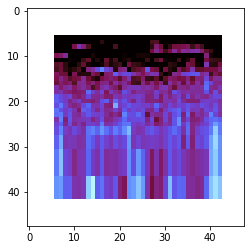

In [22]:
#Şimdi veri setimizi test edelim:
print(len(X))
plt.imshow(X[100])

In [23]:
#ardından ise y veri setini oluşturalım. Normalde veriyi işlerken sıralı bir şekilde bu veri setini txt'ye yazdırmıştım fakat ne yazık ki drive dosyaları sıraya göre dizmemekte
#Ben de bu duruma karşı dosya isimlerine hangi labellara ait olduğuna dair 0'dan 9'a bir parametre eklemiştim şimbi bu parametrelerle bu listeyi oluşturabiliriz
print(file_names)
#öncelikle listemize bir bakalım:

['image_array_7776_9.txt', 'image_array_7764_9.txt', 'image_array_7824_9.txt', 'image_array_7791_9.txt', 'image_array_7795_9.txt', 'image_array_7740_9.txt', 'image_array_7730_8.txt', 'image_array_7687_8.txt', 'image_array_7661_8.txt', 'image_array_7780_9.txt', 'image_array_7826_9.txt', 'image_array_7654_8.txt', 'image_array_7817_9.txt', 'image_array_7781_9.txt', 'image_array_7834_9.txt', 'image_array_7822_9.txt', 'image_array_7793_9.txt', 'image_array_7681_8.txt', 'image_array_7743_9.txt', 'image_array_7821_9.txt', 'image_array_7757_9.txt', 'image_array_7644_8.txt', 'image_array_7772_9.txt', 'image_array_7778_9.txt', 'image_array_7769_9.txt', 'image_array_7814_9.txt', 'image_array_7714_8.txt', 'image_array_7768_9.txt', 'image_array_7815_9.txt', 'image_array_7812_9.txt', 'image_array_7664_8.txt', 'image_array_7763_9.txt', 'image_array_7833_9.txt', 'image_array_7708_8.txt', 'image_array_7760_9.txt', 'image_array_7831_9.txt', 'image_array_7737_9.txt', 'image_array_7838_9.txt', 'image_arra

In [24]:
y = []

In [25]:
#şimdi her birisinin indexlenmiş haline göre label listemize etiketleri ekleyelim
for i in file_names:
  isplitted = i.split('_')
  
  if isplitted[3] == '0.txt':
    y.append('air_conditiner')
  elif isplitted[3] == '1.txt':
    y.append('car_horn')
  elif isplitted[3] == '2.txt':
    y.append('childeren_playing')
  elif isplitted[3] == '3.txt':
    y.append('dog_bark')
  elif isplitted[3] == '4.txt':
    y.append('drilling')
  elif isplitted[3] == '5.txt':
    y.append('engine_idling')
  elif isplitted[3] == '6.txt':
    y.append('gun_shot')
  elif isplitted[3] == '7.txt':
    y.append('jackhammer')
  elif isplitted[3] == '8.txt':
    y.append('siren')
  elif isplitted[3] == '9.txt':
    y.append('street_music')
print(y)
  

['street_music', 'street_music', 'street_music', 'street_music', 'street_music', 'street_music', 'siren', 'siren', 'siren', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'street_music', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'siren', 'street_music', 'street_music', 'street_music', 'street_music', 'street_music', 'siren', 'street_music', 'siren', 'street_music', 'siren', 'siren', 'siren', 'street_music', 'street_music', 'siren', 'siren', 'siren', 'siren', 'street_music', 'street_music', 'street_music', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'street_music', 'siren', 'street_music', 'street_music', 'siren', 'siren', 'siren', 'street_music', 'street_music', 'siren', 'street_music', 'siren', 'siren', 'stre

In [28]:
#şimdi bu labelları sayılara dönüştürelim böylece modelimiz işini çok daha kolay yapabilecektir
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [30]:
#label listemizin son haline bakalım: 
print(y)
print(len(y))

[9 9 9 ... 0 0 0]
8732


In [31]:
#matematiksel operasyonlar yapabilmek için X listemizi bir numpy array'e dönüştürüyorum
X = np.array(X)

In [32]:
#Şimdi X ve y listemizi train validation ve test kümelerine bölelim
X_train, X_rem, y_train, y_rem = train_test_split (X, y, train_size = 0.8) 
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, train_size = 0.5)

In [33]:
#Modelin daha el verişli çalışması açısından piksel değerlerini 255'e böleceğim böylece her piksel 0 ile 1 arasında değer alacaktır
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Deep Learning Model


In [148]:
#artık modelimizi oluşturmaya geçebiliriz:
model = tf.keras.Sequential()

In [149]:
print(arr.shape)

(48, 48, 3)


In [150]:
model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [151]:
model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

In [152]:
#objelerimizi 1 boyutlu hale getirelim
model.add(tf.keras.layers.Flatten())

In [153]:
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [154]:
#Output layer ekleyelim 10 adet kategorimiz olduğu için 10 nodes ayarlıyorum
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [155]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [156]:
#modelimizi eğitelim
results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

Epoch 1/64
55/55 [==============================] - 1s 14ms/step - loss: 2.1663 - accuracy: 0.1914 - val_loss: 1.8737 - val_accuracy: 0.3230
Epoch 2/64
55/55 [==============================] - 1s 11ms/step - loss: 1.8477 - accuracy: 0.3253 - val_loss: 1.4936 - val_accuracy: 0.4800
Epoch 3/64
55/55 [==============================] - 1s 11ms/step - loss: 1.6002 - accuracy: 0.4302 - val_loss: 1.2716 - val_accuracy: 0.5407
Epoch 4/64
55/55 [==============================] - 1s 11ms/step - loss: 1.4341 - accuracy: 0.4923 - val_loss: 1.1346 - val_accuracy: 0.6254
Epoch 5/64
55/55 [==============================] - 1s 11ms/step - loss: 1.3181 - accuracy: 0.5404 - val_loss: 1.0237 - val_accuracy: 0.6472
Epoch 6/64
55/55 [==============================] - 1s 11ms/step - loss: 1.2286 - accuracy: 0.5768 - val_loss: 0.9984 - val_accuracy: 0.6609
Epoch 7/64
55/55 [==============================] - 1s 11ms/step - loss: 1.1392 - accuracy: 0.6054 - val_loss: 0.9453 - val_accuracy: 0.6907
Epoch 8/64
55

# Results

##Değerler:

model.add(tf.keras.layers.Conv2D(48,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))


model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))


model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))


model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64,activation = 'relu'))


model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

### Loss:

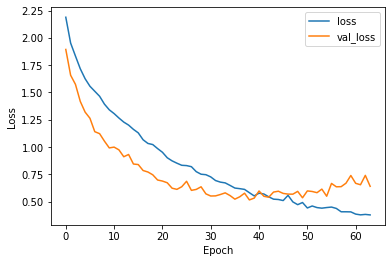

In [43]:

plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

### Accuracy:

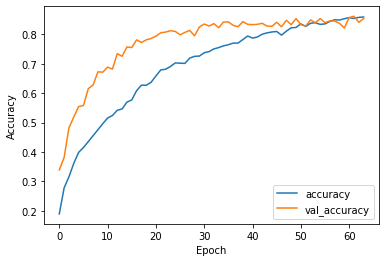

In [44]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

###Test:

In [45]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.7212 - accuracy: 0.8375
Bu parametrelere sahip model için test sonuçları
Loss: 0.7211900949478149
Accuracy:0.8375285863876343


#Results

##Değerler(Model1):

model.add(tf.keras.layers.Conv2D(48,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))


model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))


model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))


model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64,activation = 'relu'))


model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

### Loss:

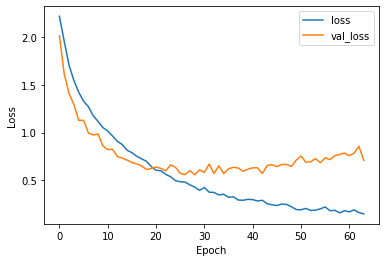

In [56]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

### Accuracy:

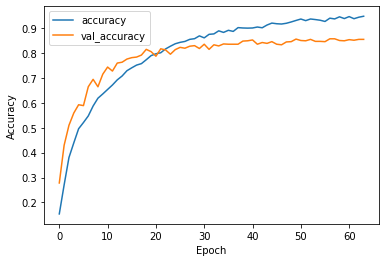

In [57]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

### Test Results:

In [58]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.8570
Bu parametrelere sahip model için test sonuçları
Loss: 0.8315062522888184
Accuracy:0.8569794297218323


Görüldüğü üzere düğüm sayılarını artırmak sadece 0.02 accuracy artışına yol açarken aynı zamanda loss'u 0.12 artırdı. Bu verimli olmadığı için yöntemin doğru olmadığı kanısına vardım. 

## Değerler(Model2):

model.add(tf.keras.layers.Conv2D(48,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

### Loss:

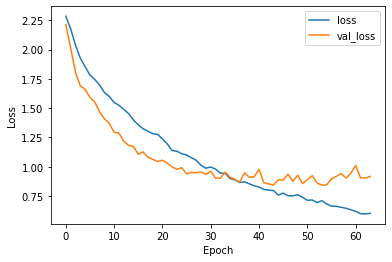

In [68]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

### Accuracy

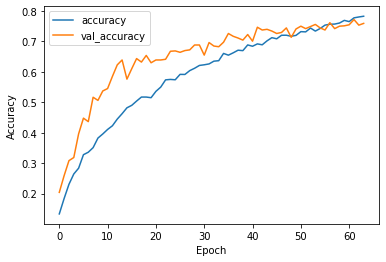

In [69]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

### Test Results:

In [70]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 3ms/step - loss: 0.9845 - accuracy: 0.7574
Bu parametrelere sahip model için test sonuçları
Loss: 0.9844614267349243
Accuracy:0.7574370503425598


Bu iki fonksiyondan da daha verimsiz oldu. İlk başta aldığımız değerlerde input fonksiyon düğümlerini artırmayı deneyelim.

##Değerler(Model3):
model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

###Loss:

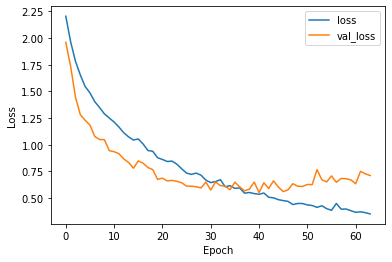

In [83]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

###Accuracy

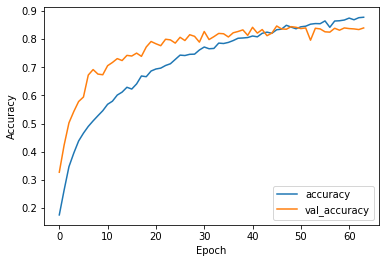

In [84]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [85]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.8501
Bu parametrelere sahip model için test sonuçları
Loss: 0.672789990901947
Accuracy:0.8501144051551819


Bu yöntem iyice loss'u hatrı sayılır azalttı ve accuracy'yi artırdı. Aynı şeyi daha da artırmayı deneyeceğim.

##Değerler(Model4):
model.add(tf.keras.layers.Conv2D(48,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 64, validation_data = (X_val, y_val))

###Loss:

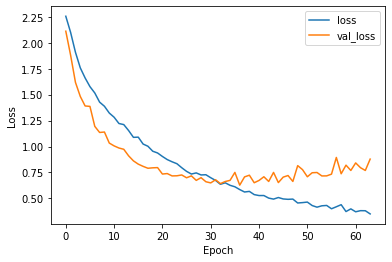

In [95]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

###Accuracy:

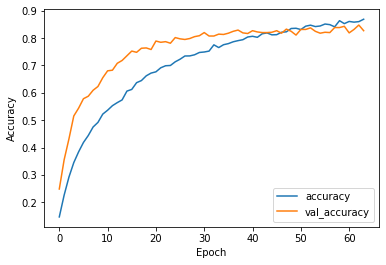

In [96]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

###Test Results:

In [97]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.8520 - accuracy: 0.8341
Bu parametrelere sahip model için test sonuçları
Loss: 0.8519734740257263
Accuracy:0.8340961337089539


Yaptığımız test'e göre bu da bir işe yaramamış bulunuyor. Şimdi parametreyi tekrar en çok performans aldığımız 64'e çekip batch_size ve epoch sayılarında artırım yapacağım.

##Değerler(Model5):
model.add(tf.keras.layers.Conv2D(48,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 256, epochs = 64, validation_data = (X_val, y_val))

###Loss:

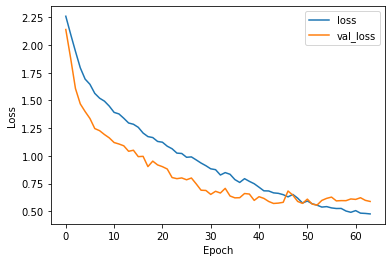

In [107]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

###Accuracy:

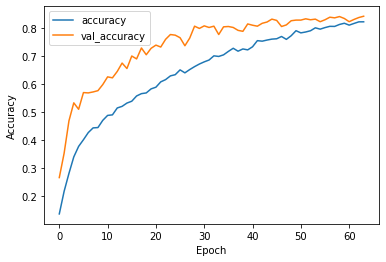

In [108]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

###Test Results:

In [109]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.8398
Bu parametrelere sahip model için test sonuçları
Loss: 0.6641479134559631
Accuracy:0.8398169279098511


Model3 şu ana kadar elimizdeki en iyi model şimdi son bir deney yapıp model3'ün batch sayısını yükseltmeyi deneyelim.

##Değerler(Model6):
model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 256, epochs = 64, validation_data = (X_val, y_val))



###Loss:

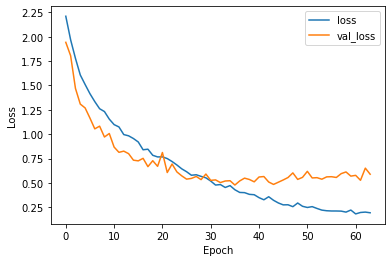

In [119]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

###Accuracy:

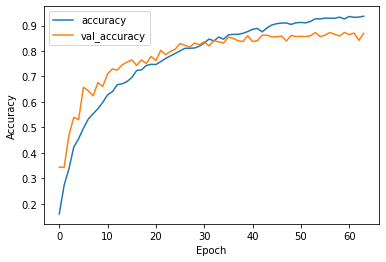

In [120]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

###Test Results:

In [121]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.8593
Bu parametrelere sahip model için test sonuçları
Loss: 0.6964961290359497
Accuracy:0.8592677116394043


Düşündüğümüz gibi bir artış sağlanmadı. Accuracy sadece 0.01 artarken loss 0.02 arttı bu da yeterli bir performans değil son olarak model3'ün epoch sayısını yükseltmeyi deneyelim.

##Değerler(Model7):
model.add(tf.keras.layers.Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu', input_shape = (48, 48, 3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = 'same' , activation = 'relu'))

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

results = model.fit(X_train, y_train, batch_size = 128, epochs = 80, validation_data = (X_val, y_val))

###Loss:

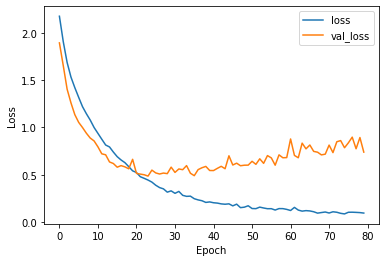

In [131]:
plt.plot(results.history['loss'], label = 'loss')

plt.plot(results.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.show()

###Accuracy:

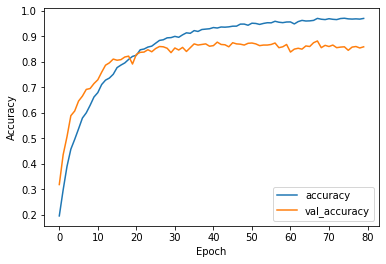

In [132]:
plt.plot(results.history['accuracy'], label = 'accuracy')

plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

###Test Results:

In [133]:
test_results = model.evaluate(X_test,y_test)
print(f'Bu parametrelere sahip model için test sonuçları\nLoss: {test_results[0]}\nAccuracy:{test_results[1]}')

28/28 [==============================] - 0s 4ms/step - loss: 0.8113 - accuracy: 0.8581
Bu parametrelere sahip model için test sonuçları
Loss: 0.811263918876648
Accuracy:0.8581235408782959


Yine beklediğimiz gibi bir sonuç alamadık.

#Conclusion

Elimizdeki hyperparameter ayarlaması yapılmış modellerin içinde en iyi sonuç model3'e ait çıktı bu durumda modelin son halini model3'ün parametrelerine göre ayarladım. Şimdi model3'e elimle bir veri göndereceğim ve çalışıp çalışmadığını kontrol edeceğim. Böylece projenin sonuna gelmiş olacağız.

In [162]:
#öncelikle class isimlerini içeren bir sözlük yapısı oluşturalım:
classes = {
    0:'Air Conditiner',
    1:'Car Horn',
    2:'Childeren Playing',
    3:'Dog Bark',
    4:'Drilling',
    5:'Engine Idling',
    6:'Gun Shot',
    7:'jackhammer',
    8:'Siren',
    9:'Street Music'
}



In [165]:

prediction_result = model.predict(X_test[24].reshape(1,48,48,3))
prediction_result

array([[1.2776225e-07, 1.6679125e-09, 9.9972898e-01, 5.5748005e-06,
        2.7984845e-10, 3.0480585e-09, 3.4980118e-12, 2.6543516e-14,
        2.2106622e-07, 2.6502827e-04]], dtype=float32)

In [166]:

predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()

print(f'Bu resim {predicted_probability} ihtimalle {classes[predicted_class]} sınıfına ait')


Bu resim 0.9997289776802063 ihtimalle Childeren Playing sınıfına ait


Bu bootcamp'i bize sağladıkları ve bana şu projenin kazandırdığı deneyimi kazanmam için yol açtıklarından dolayı Global AI Hub, Koç Holding AŞ ve Aygaz'a teşekkürlerimi sunarım. Proje bitmiş bulunmaktadır.

Global AI Hub Koç Holding AŞ Derin Öğrenme Bootcamp
37. Grup Pioneers Proje

#Fırat Çetin